In [1]:
from IPython.display import HTML

In [2]:
# Script to hide/unhide code boxes
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Code is hidden for easier reading.
 <b><font size="3">To toggle on/off code, 
 click</font></b> <a href="javascript:code_toggle()">here</a>.''')

## ML models trained on 130K records of airline customer's ratings of various attributes of travel

The data contains 130,000 records of customer ratings of 16 attributes such as, _Ease of Online booking_,_Gate location_, _Food and drink_, _Online boarding_,_Seat comfort_ etc. Besides that it also contains customer's age, gender, flight distance, flight class and others.

#### Potential business uses:
- Identify which attributes contribute most towards a customer satisfaction.

### Objective: To train an ML model to predict customer satisfaction based on the attributes rated, but more importantly identify which attribute contribute most to customer satisfaction

Note: There is no information given about how, which airline(s) or any explanation of the columns of this data. The data file can be downloaded from [here](https://www.ibm.com/communities/analytics/watson-analytics-blog/sample-data-airline-survey/)

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import category_encoders as ce
from time import time
import warnings
import os

warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
dirname='D:\ML-Data\\airline-cust-ratings-of-svc'
filename='SatisfactionSurvey.csv'
statdf=pd.read_csv(os.path.join(dirname,filename))

#### Shape of dataframe, display a row

In [6]:
ratingdf.shape

(129880, 24)

In [7]:
ratingdf.head(1)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0


#### check dtypes

In [8]:
ratingdf.dtypes

id                                     int64
satisfaction_v2                       object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

#### Check and clean nulls

In [9]:
## Check nulls/NaNs - missing data
print('Total Nulls={}, which is {:2.2f}% of all data'.format(ratingdf.isna().sum().sum(),100*ratingdf.isna().sum().sum()/ratingdf.size))

#missing data
total = ratingdf.isnull().sum().sort_values(ascending=False)
percent = (ratingdf.isnull().sum()*100/ratingdf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('Top 10 columns with highest %age of nulls:')
missing_data

Total Nulls=393, which is 0.01% of all data
Top 10 columns with highest %age of nulls:


,Total,Percent
Arrival Delay in Minutes,393,0.302587
Departure Delay in Minutes,0,0.000000
satisfaction_v2,0,0.000000
Gender,0,0.000000
Customer Type,0,0.000000
Age,0,0.000000
Type of Travel,0,0.000000
Class,0,0.000000
Flight Distance,0,0.000000
Inflight wifi service,0,0.000000


#### Its pretty much clean, lets just replace the nan in 'Arrival Delay...' by the mean of the column

In [10]:
avg=int(ratingdf['Arrival Delay in Minutes'].mean())
ratingdf['Arrival Delay in Minutes'].fillna(avg, inplace=True)
print('Replaced by mean. Nulls=',ratingdf['Arrival Delay in Minutes'].isna().sum())
ratingdf.isna().sum()

Replaced by mean. Nulls= 0


id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

#### Lets inspect each variable, its type, categories etc.

In [11]:
def show_val_cnts(df):
    cols=df.select_dtypes(exclude='float64').columns
    for col in cols:
        print('****col: {} of type: {}'.format(col,df[col].dtype))
        print(df[col].value_counts())

In [12]:
show_val_cnts(ratingdf)

****col: id of type: int64
2047      1
21792     1
115986    1
118035    1
128276    1
124182    1
126231    1
103704    1
105753    1
99610     1
101659    1
111900    1
113949    1
107806    1
109855    1
23841     1
120080    1
17698     1
19747     1
29988     1
32037     1
25894     1
27943     1
5416      1
7465      1
1322      1
3371      1
13612     1
15661     1
9518      1
         ..
4823      1
6870      1
94843     1
84604     1
82557     1
88702     1
86655     1
43712     1
41665     1
47810     1
45763     1
35524     1
33477     1
39622     1
37575     1
60104     1
58057     1
64202     1
62155     1
51916     1
49869     1
56014     1
53967     1
10960     1
8913      1
15058     1
13011     1
2772      1
725       1
2049      1
Name: id, Length: 129880, dtype: int64
****col: satisfaction_v2 of type: object
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction_v2, dtype: int64
****col: Gender of type: object
Female    65899
Male      6

### Handling of variables
I plan to use a decsion tree based algorithm (Lightgbm or XGBoost) which have the following properties wrt to variables:
- Categorical variables better to be in ordinal form, instead of one-hot encoded.
- Continous variables will long tail distributions don't need to be binned/quantized because the tree algorithm already forms a histogram of the variable for decision

#### Use satisfaction_v2 as target:
- id int64: do nothing, in fact will not be used
- Customer Type object: ??? I don't know what this is. Is it referring to the loyality probr may leak info, remove
- satisfaction_v2 object: change to categorical. Will make this the target variable

#### Change to categorical (ordinal): 
- Gender object: change to categorical
- Type of Travel object: change to categorical
- Class object: change to categorical

#### No change: would have required binning, but not done:
- Age int64: requires binning/quantization, 
- Flight Distance int64: requires binning 
- Departure Delay in Minutes int64: requires binning 

#### No change: already in categorical ordinal: 
- Inflight wifi service of type: int64
- Departure/Arrival time convenient of type: int64
- Ease of Online booking of type: int64
- Gate location of type: int64
- Food and drink of type: int64
- Online boarding of type: int64
- Seat comfort of type: int64
- Inflight entertainment of type: int64
- On-board service of type: int64
- Leg room service of type: int64
- Baggage handling of type: int64
- Checkin service of type: int64
- Inflight service of type: int64
- Cleanliness of type: int64


#### Encode categorical columns<a id='encode'></a>

Although I don't need one-hot encoding but lets cater for both, its a simple function:

- __*Choice*__:
    - Ordinals: For decision-tree based algorithms such as XGBoost, LightGBM and Catboost as well as for neural nets the encoding of categorical variables as oridnal values is preffered.
    - One-hot: For most of the other ML algorithms work better with one-hot encoded variables
    
#### Note: I change the dtype of all categorical(ordinal) columns to 'int8', this helps in identifying the categorical colums.

In [13]:
# One-hot encoding
def make_onehot(df, cols):
    # cols=df.select_dtypes('object').columns
    df=pd.get_dummies(df)
    print('{} new one-hot columns added'.format(len(df.select_dtypes('uint8').columns)))
    print('{} original columns removed'.format(len(cols)))
    print('Now total columns=',df.shape[1])
    return df

def make_ordinals(df, cols):  
    # wanted to use 'ce' from: import category_encoders as ce, pandas factorize is more easy
    df[cols]=df[cols].apply(lambda x: pd.factorize(x)[0])
    
    # change dtype of cols to uint8
    df[cols]=df[cols].astype(dtype='uint8')
    print('Oridinals encoded:')
    for col in cols:
        print(df[col].value_counts())
    #display(df[cols].head(2))
    return df

def cat_encode(df,col,onehot=True):
    if onehot:
        return make_onehot(df,cols)
    return make_ordinals(df, cols)

In [14]:
cols=['satisfaction_v2','Gender','Type of Travel', 'Class','Customer Type']
_=cat_encode(ratingdf,cols,onehot=False)

# drop id column
ratingdf.drop(labels='id',axis='columns',inplace=True)
print("'id' column dropped")

#also change other ordinals to int8
ord_cols=[ 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
ratingdf[ord_cols]=ratingdf[ord_cols].astype(dtype='uint8')
print('All ordinal columns:', ratingdf.select_dtypes('uint8').columns)

Oridinals encoded:
1    73452
0    56428
Name: satisfaction_v2, dtype: int64
1    65899
0    63981
Name: Gender, dtype: int64
1    89693
0    40187
Name: Type of Travel, dtype: int64
1    62160
0    58309
2     9411
Name: Class, dtype: int64
1    106100
0     23780
Name: Customer Type, dtype: int64
'id' column dropped
All ordinal columns: Index(['satisfaction_v2', 'Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')


### Quick Statistical analysis & visualization

#### Lets visualize a correlation matrix to see how the features are correlated with the target variable and with each other

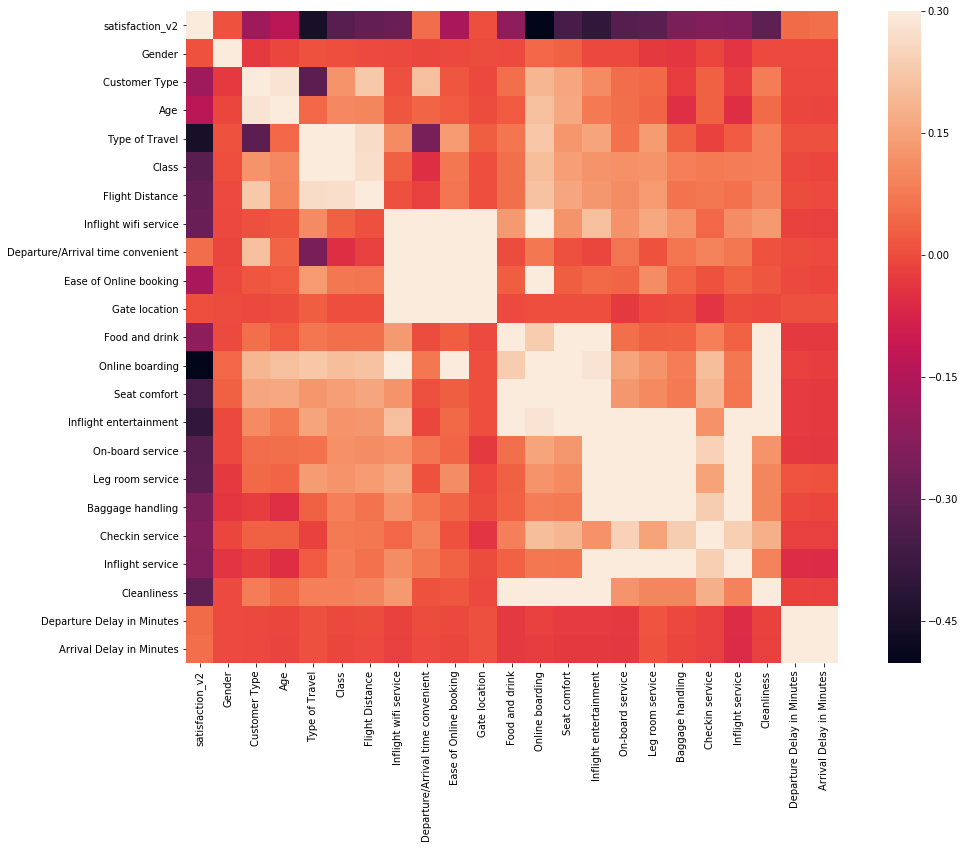

In [15]:
#correlation matrix
corrmat = ratingdf.corr()
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corrmat, vmax=.3, square=True);

###### Satisfication variable shows positive correlation with 'Departure Arrival Time Convience' but not very strong. Other interesting corelations are there too

#### Lets redraw with more detail

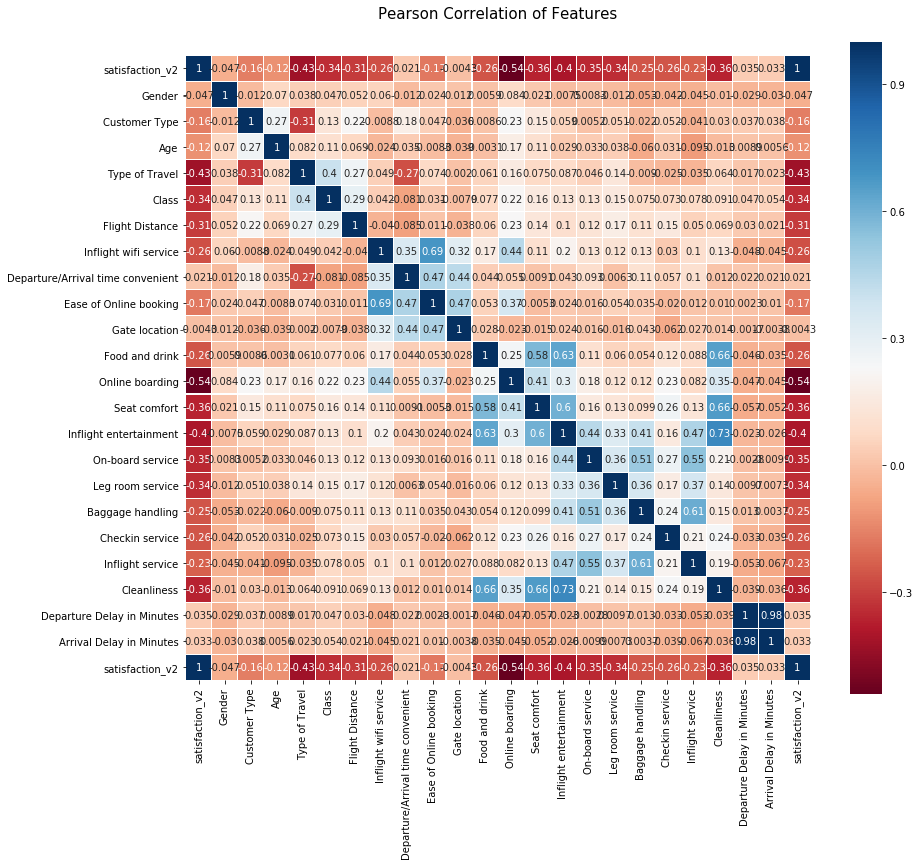

In [16]:
htmpdf=ratingdf.sample(n=1000)
htmpdf=htmpdf[list(htmpdf.columns)+['satisfaction_v2']]
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
_=sns.heatmap(htmpdf.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True,annot_kws={"size": 10})

#### 'Online boarding','Type of Travel','Seat Comfort' are some of the highest correlated features with 'Satisfaction'

##### Note the negative sign for correlation numbers for most of the features. This is because of the coding of the ordinals. This means that for the survey questions '0' was assigned to the highest rating, and the '1' for the next best and '5' for the worst rating. Therefore, these features are negatively correlated with satisfaction.

#### Lets draw another view with just abosulte value of correlation with 'satisfaction_v2' in decending order

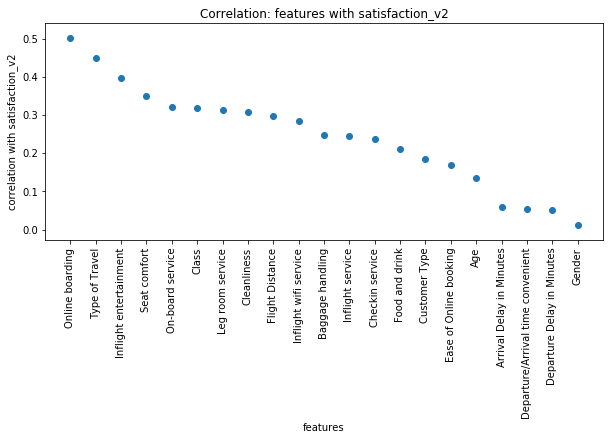

In [17]:
corrmat['satisfaction_v2']=abs(corrmat['satisfaction_v2']) # don't care about negative or positive correlation
n=corrmat.shape[0]-1
corr_y=corrmat.nlargest(n, columns=['satisfaction_v2'])['satisfaction_v2']
plt.figure(figsize=(10,4))
plt.title('Correlation: features with satisfaction_v2')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('correlation with satisfaction_v2')
plt.scatter(x=corr_y[1:].index, y=corr_y[1:].values, marker='o')
plt.show();

#### Check data imbalance

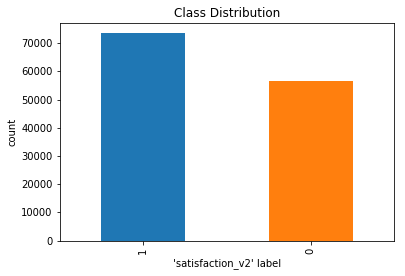

The negative class(y=0) is 57% of data
The positive class(y=1) is 43% of data


In [18]:
# check for data imbalance
leng=len(ratingdf)
vc_y=ratingdf['satisfaction_v2'].value_counts()

plt.title('Class Distribution')
plt.xlabel("'satisfaction_v2' label")
plt.ylabel('count')
vc_y.plot(kind='bar');
plt.show()
print('The negative class(y=0) is {:2.0f}% of data'.format(vc_y[1]*100/leng))
print('The positive class(y=1) is {:2.0f}% of data'.format(vc_y[0]*100/leng))


#### There is no significant imbalance

##### Note: There are many other statistical aspects of data that can be assessed/visualized, e.g. outliers, skew, univariate/multivariate distribution of variables

### LightGBM Model setup & training

LGBM is a gradient boosted tree based algorithm

In [19]:
from sklearn.linear_model import LogisticRegression
from timeit import default_timer as timer
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc
import lightgbm as lgb

#### Use some procedures, if have time will use same procs for XGBoost

In [20]:
# Get X,y df and change categorical cols to type 'category'
def get_Xy_cat(df,feat_cols,cate_cols,target_col=None):
    
    df[cate_cols]=df[cate_cols].astype('category')
    
    X=df[feat_cols]
    print('uint8 columns converted to "category" dtype')
    
    if target_col is not None:
        y=df[target_col]
        print('X shape:',X.shape)
        print('y shape:',y.shape)
        return X,y
    print('X shape:',X.shape)
    return X   

def get_Xy_valid(X,y, test_size=0.20):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=123)

    dfnames=['X_train', 'X_val', 'y_train', 'y_val']
    dfs=[X_train, X_val, y_train, y_val]
    
    for name,df in zip(dfnames,dfs):
        print('shape {}:{}'.format(name,df.shape))

    return X_train, X_val, y_train, y_val

# For creating train and validation indices for CV
def get_cv(CV_type, n_folds):
    if CV_type=='strat':
        folds = StratifiedKFold(n_splits= n_folds, shuffle=True, random_state=1001)
    else:
        folds = KFold(n_splits= n_folds, shuffle=True, random_state=1001)
    
    cvtype=str(type(folds))
    cvtype=cvtype[39:-2]  # extracting the name of cv type ie 'StratifiedKFold' or 'KFold'
    print('Data set for {} cross validation with {} folds'.format(cvtype, folds.n_splits))
    return folds

# callback
def callback_proc(view_iters=10):
    def callback(env):
        iter_show=int((env.end_iteration-env.begin_iteration)/view_iters)
        if env.iteration%iter_show == 0:
            trn_res=env.evaluation_result_list[0]  # Train result
            evl_res=env.evaluation_result_list[1]  # Eval result
            metric=trn_res[1]                      # e.g. 'AuC', 'rmse'
            tr_ev_del=trn_res[2]-evl_res[2]      # difference between train and eval metric value
            print('iter# {:5d} {}: eval={:2.4f} train={:2.4f} trn-evl={:2.4f}'.format(
                env.iteration,metric,evl_res[2],trn_res[2],tr_ev_del))
    return callback

## lgb specific proc

def lgb_model_CV(X,y,params,early_stopping_rounds, X_test=None, CV_type='strat', n_folds=5, view_iters=10):    
    warnings.filterwarnings("ignore")
        
    startmain=time()
    folds=get_cv(CV_type=CV_type, n_folds=n_folds)

    # Create arrays and dataframes to store results
    oof_preds = np.zeros(X.shape[0])         # for out of fold predictions
    if X_test is not None:
        tst_preds = np.zeros(X_test.shape[0])    # for creating predictions on test data

    cvtype=str(type(folds))
    cvtype=cvtype[39:-2]  # extracting the name of cv type ie 'StratifiedKFold' or 'KFold'
    print('Training: with {} cross validation with {} folds'.format(cvtype, folds.n_splits))

    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
        dtrain = lgb.Dataset(data=X.iloc[train_idx], label=y.iloc[train_idx])
        dvalid = lgb.Dataset(data=X.iloc[valid_idx], label=y.iloc[valid_idx])

        startfold=time()
        print('Fold {} started'.format(n_fold+1)) 

        evals_result = {}
        model= lgb.train(
            params = params, 
            train_set = dtrain, 
            valid_sets=[dtrain,dvalid], 
            valid_names=['train', 'eval'], 
            early_stopping_rounds=early_stopping_rounds, 
            evals_result=evals_result, 
            verbose_eval=False, 
            callbacks=[callback_proc(view_iters)]
        )

        oof_preds[valid_idx] = model.predict(X.iloc[valid_idx])
        if X_test is not None:
            tst_preds += model.predict(X_test) # take sum and later divide by 'folds.n_splits' in the end to calculate mean

        print('Fold {} time={:4.2f} secs'.format(n_fold+1, time()-startfold))
        print('Fold {} AUC {:2.6f}'.format(n_fold + 1, roc_auc_score(y.iloc[valid_idx], oof_preds[valid_idx])))
        print('----------------------------')

    if X_test is not None:
        tst_preds/=folds.n_splits  # take mean of predications generated on test data
    else:
        tst_preds=None

    FullAUC=roc_auc_score(y, oof_preds)
    print('Full AUC score {:2.6f}'.format(FullAUC))
    print('Total time {:4.2f} secs'.format(time()-startmain))

    warnings.filterwarnings("default")    # turn on the warnings
    return tst_preds, model

def lgb_model_noCV(params,early_stopping_rounds, X,y, X_test=None, test_size=0.20):
    warnings.filterwarnings("ignore")
    
    get_Xy_valid(X,y, test_size=test_size)
    dtrain =lgb.Dataset(data=X_train,label=y_train)
    dvalid =lgb.Dataset(data=X_val,label=y_val)
    
    print('Training: with {:2d}% of data as validation set'.format(int(test_size*100)))
    
    evals_result = {}
    model= lgb.train(
        params = params, 
        train_set = dtrain, 
        valid_sets=[dtrain,dvalid], 
        valid_names=['train', 'eval'], 
        early_stopping_rounds=early_stopping_rounds, 
        evals_result=evals_result, 
        verbose_eval=False, 
        callbacks=[callback_proc()]
    )

    print("LightGBM Training Completed...")    

    if X_test is not None:
        tst_preds = model.predict(X_test, num_iteration=model.best_iteration)
        print('Predictions generated for X_test')
    else:
        tst_preds=None
        
    #FullAUC=roc_auc_score(y, oof_preds)
    #print('Full AUC score {:2.6f}'.format(FullAUC))
    #print('Total time {:4.2f} secs'.format(time()-startmain))
    
    warnings.filterwarnings("default")    # turn on the warnings
    return tst_preds, model

def plot_prAUC2(modle, X,y):
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    preds=model.predict(X)
    
    preds2=1-preds
    proba=np.vstack((preds2, preds)).T
    
    skplt.metrics.plot_precision_recall(y, proba) 
    skplt.metrics.plot_roc(y, proba)  # proba is both class 0 & 1 probs
    plt.show()    

## Predict using model
def make_preds(model,X,y):
    preds=model.predict(X)
    plot_prAUC(y, preds)

# for plotting AuC ROC
def plot_prAUC(actual,proba):
    frp,trp, threshold = roc_curve(actual,proba)
    roc_auc_ = auc(frp,trp)
    
    plt.figure(figsize=(10,6))
    plt.title('Reciever Operating Characteristics',fontsize=16)
    plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    
#def feat_imp(model,X,imp_type='gain',n=30):
#    feature_imp = pd.DataFrame(sorted(zip(lgbm1.feature_importance(importance_type=imp_type),X.columns)), columns=['Value','Feature'])
def feat_imp(model,feat_cols,imp_type='gain',n=30):
    feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(importance_type=imp_type),feat_cols)), columns=['Value','Feature'])    
    
    plt.figure(figsize=(20, 10))
    plt.rc('font', size=12)
    sns.set(font_scale=2) 
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:n])
    plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=12)
    
    plt.title('LightGBM Features by '+imp_type)
    plt.tight_layout()
    plt.show()      

#### Prepare data for train/validate and testing

In [22]:
TARGET_COL='satisfaction_v2'            # the column name of the output/target label
not_ftrs_cols=['id']+[TARGET_COL]
FEAT_COLS = [f for f in ratingdf.columns if f not in not_ftrs_cols]
CATE_COLS=ratingdf.select_dtypes('uint8').columns

traindf=ratingdf.sample(frac=0.9,random_state=123)
testdf=ratingdf.drop(traindf.index)
print('traindf shape:',traindf.shape)
print('testdf shape:',testdf.shape)

# Get X,y and change categorical cols to type 'category'
X_trn,y_trn=get_Xy_cat(traindf.copy(),FEAT_COLS,CATE_COLS,TARGET_COL)
X_tst,y_tst=get_Xy_cat(testdf.copy(),FEAT_COLS,CATE_COLS,TARGET_COL)

traindf shape: (116892, 23)
testdf shape: (12988, 23)
uint8 columns converted to "category" dtype
X shape: (116892, 22)
y shape: (116892,)
uint8 columns converted to "category" dtype
X shape: (12988, 22)
y shape: (12988,)


#### Set hyperparameters

In [23]:
# LGBM hyper parameters
params = {
    #### Objective & metrics parms ###
    'objective': 'binary',
    'metric': 'auc',
    'metric_freq': 4,                   # default = 1, frequency for metric output
    'is_provide_training_metric': True, # default = false, true = output metric result over training dataset
    
    #### Learning params ####
    'num_leaves': 15,         # 31 def  
    'max_depth': 3,          # -1 def
    'learning_rate' : 0.1,   # 0.1 def
    'n_estimators': 500,     # 100 def
    
    #### others ####
    'num_threads': 6,        # -1
    'seed': 123,
    'verbose': -1,
    
    #### control over-fitting###
    'max_bin': 15,    # 255   
   # 'num_leaves': 31 already covered in main parms above
    'min_data_in_leaf': 16,  #20
    'bagging_fraction': 1,   # 1
    'feature_fraction': 0.1, # 1
    ###### regularization ######
    'lambda_l1': 10.0,  # 0.0
    'lambda_l2': 10.0,  # 0.0
    'min_gain_to_split': 0.0,  # 0.0 
}

#### Train model with stratifiedKFold CV

In [24]:
early_stopping_rounds=50
CV_type=  'strat'  # 'strat' for stratifiedKFold (default), anything else for Kfold e.g #CV_type= 'kfold'
n_folds =  5       # number of folds for CV, defualt = 5
view_iters=10      # how many times you want the results printed per fold, defualt = 10 
#X_test = X_test    # defualt=None

_ , lgbmCV = lgb_model_CV(X_trn,
                          y_trn,
                          params,
                          early_stopping_rounds, 
                          #X_test=None, 
                          CV_type=CV_type, 
                          n_folds=n_folds, 
                          view_iters=view_iters
)

Data set for StratifiedKFold cross validation with 5 folds
Training: with StratifiedKFold cross validation with 5 folds
Fold 1 started
iter#     0 auc: eval=0.6344 train=0.6387 trn-evl=0.0043
iter#    50 auc: eval=0.9555 train=0.9539 trn-evl=-0.0016
iter#   100 auc: eval=0.9665 train=0.9653 trn-evl=-0.0012
iter#   150 auc: eval=0.9716 train=0.9706 trn-evl=-0.0010
iter#   200 auc: eval=0.9790 train=0.9783 trn-evl=-0.0007
iter#   250 auc: eval=0.9817 train=0.9813 trn-evl=-0.0004
iter#   300 auc: eval=0.9830 train=0.9827 trn-evl=-0.0003
iter#   350 auc: eval=0.9842 train=0.9841 trn-evl=-0.0001
iter#   400 auc: eval=0.9851 train=0.9850 trn-evl=-0.0001
iter#   450 auc: eval=0.9857 train=0.9857 trn-evl=-0.0000
Fold 1 time=2.40 secs
Fold 1 AUC 0.986105
----------------------------
Fold 2 started
iter#     0 auc: eval=0.6365 train=0.6383 trn-evl=0.0018
iter#    50 auc: eval=0.9547 train=0.9540 trn-evl=-0.0007
iter#   100 auc: eval=0.9658 train=0.9654 trn-evl=-0.0005
iter#   150 auc: eval=0.971

#### Make prediction on test set

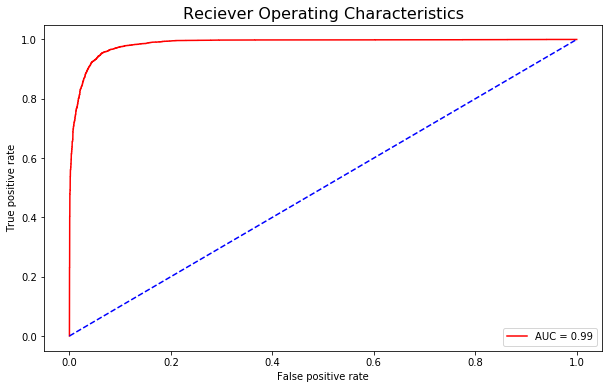

In [25]:
make_preds(lgbmCV,X_tst,y_tst)

#### Lets see feature importance by 'gain' and by 'split'
-'gain' is how information did the feature contribute in making all the splits
-'split' is the numbers of times the feature is used in the model.

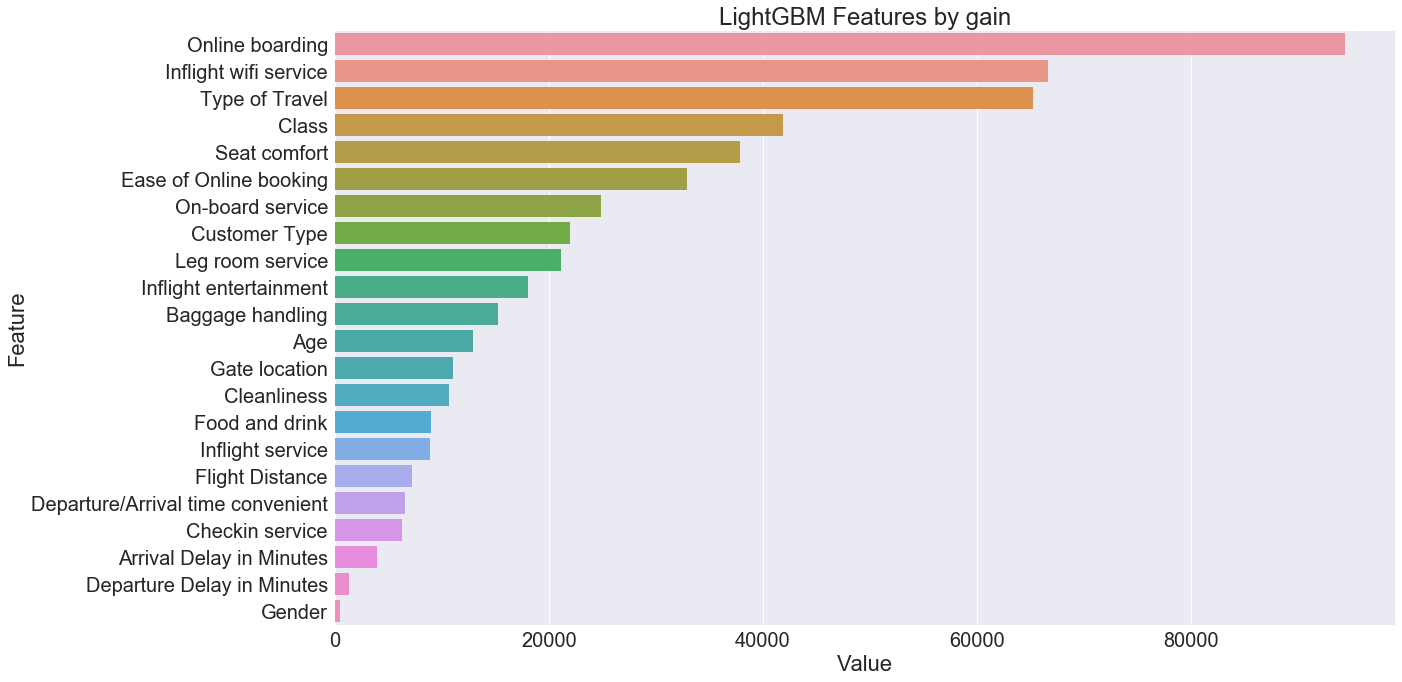

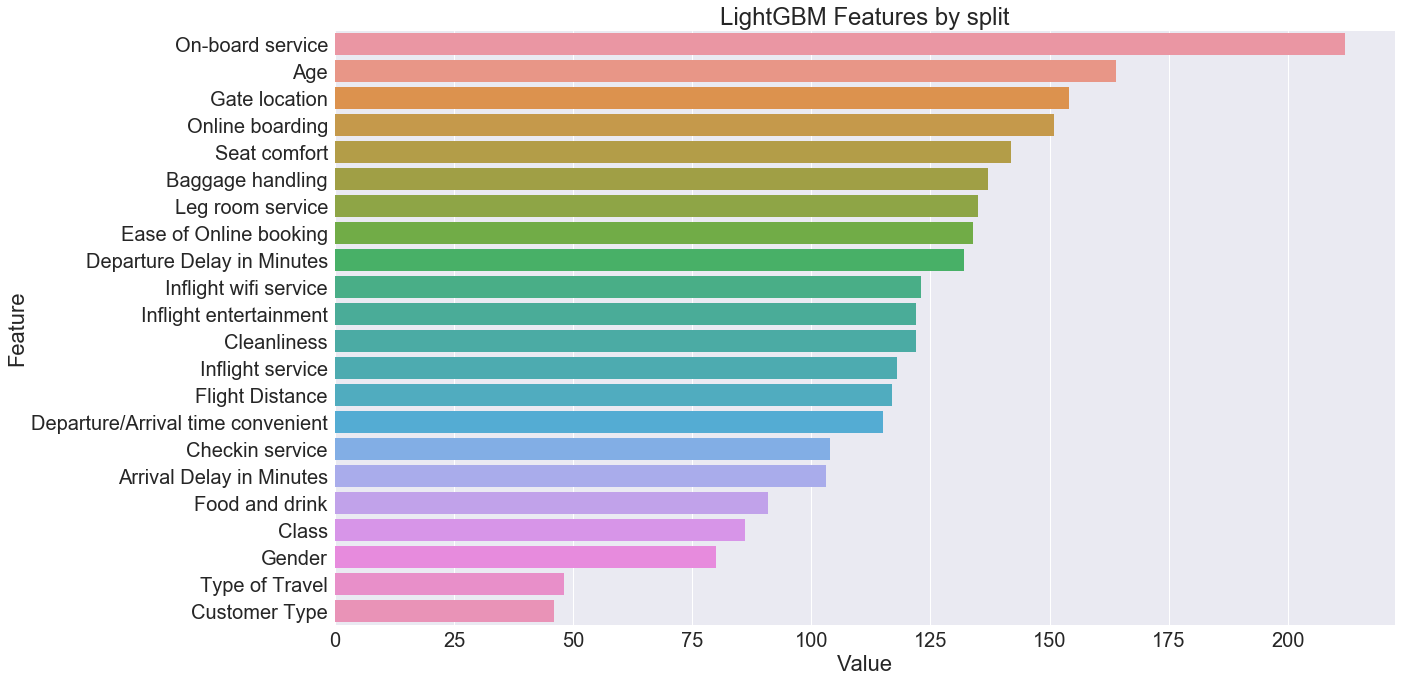

In [26]:
feat_imp(lgbmCV,FEAT_COLS,imp_type='gain',n=30)
feat_imp(lgbmCV,FEAT_COLS,imp_type='split',n=30)

#### Conlcusion

The top four services that contributed most towards positive customer satifisfaction are 'Online boarding','Inflight wifi service', 'Type of Travel', and 'Class'.

The services that least affect positive customer satisfaction are 'Checkin service','Arrival Delay in Minutes', 'Departure Delay in Minutes' and Gender.

Note that 'Gender' not affecting customer satisfaction makes sense and could be correct. However, arrival and departure delay having least affect on positive customer satisfaction doesn't make sense. Requires analyzing data further.